# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [2]:
#your code here
# Separated by commas
df_sal = pd.read_csv('HW1/Baseball 2017/Salaries.csv')
df_teams = pd.read_csv('HW1/Baseball 2017/Teams.csv')
print df_sal.head(3)
print "len of Teams", len(df_teams.index)
df_teams.head(3)

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
len of Teams 2835


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [3]:
df_year_sal = df_sal.groupby(['teamID', 'yearID']).sum()
df_year_sal.columns =[u'yearSalary']
df_year_sal.head(3)

yearSalary
teamID yearID            
ANA    1997      31135472
       1998      41281000
       1999      55388166

#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [4]:
# checking the data
sorted_team_tIDs = np.sort(df_teams.teamID.unique())
sorted_sal_tIDs = np.sort(df_sal.teamID.unique())

mask = np.in1d(sorted_sal_tIDs, sorted_team_tIDs, invert=True)

print 'unique teamIDs in Teams:\n\n', sorted_team_tIDs
print '\nunique teamIDs in Salaries:\n\n', sorted_sal_tIDs
print '\nSal tIDs not in Team :', sorted_sal_tIDs[mask]
# there are lots of teams in TEAMS not in SALARIES

unique teamIDs in Teams:

['ALT' 'ANA' 'ARI' 'ATL' 'BAL' 'BFN' 'BFP' 'BL1' 'BL2' 'BL3' 'BL4' 'BLA'
 'BLF' 'BLN' 'BLU' 'BOS' 'BR1' 'BR2' 'BR3' 'BR4' 'BRF' 'BRO' 'BRP' 'BS1'
 'BS2' 'BSN' 'BSP' 'BSU' 'BUF' 'CAL' 'CH1' 'CH2' 'CHA' 'CHF' 'CHN' 'CHP'
 'CHU' 'CIN' 'CL1' 'CL2' 'CL3' 'CL4' 'CL5' 'CL6' 'CLE' 'CLP' 'CN1' 'CN2'
 'CN3' 'CNU' 'COL' 'DET' 'DTN' 'ELI' 'FLO' 'FW1' 'HAR' 'HOU' 'HR1' 'IN1'
 'IN2' 'IN3' 'IND' 'KC1' 'KC2' 'KCA' 'KCF' 'KCN' 'KCU' 'KEO' 'LAA' 'LAN'
 'LS1' 'LS2' 'LS3' 'MIA' 'MID' 'MIL' 'MIN' 'ML1' 'ML2' 'ML3' 'ML4' 'MLA'
 'MLU' 'MON' 'NEW' 'NH1' 'NY1' 'NY2' 'NY3' 'NY4' 'NYA' 'NYN' 'NYP' 'OAK'
 'PH1' 'PH2' 'PH3' 'PH4' 'PHA' 'PHI' 'PHN' 'PHP' 'PHU' 'PIT' 'PRO' 'PT1'
 'PTF' 'PTP' 'RC1' 'RC2' 'RIC' 'SDN' 'SE1' 'SEA' 'SFN' 'SL1' 'SL2' 'SL3'
 'SL4' 'SL5' 'SLA' 'SLF' 'SLN' 'SLU' 'SPU' 'SR1' 'SR2' 'TBA' 'TEX' 'TL1'
 'TL2' 'TOR' 'TRN' 'TRO' 'WAS' 'WIL' 'WOR' 'WS1' 'WS2' 'WS3' 'WS4' 'WS5'
 'WS6' 'WS7' 'WS8' 'WS9' 'WSU']

unique teamIDs in Salaries:

['ANA' 'ARI' 'ATL' 'BAL' 'BOS' 'CAL'

In [5]:
# problem - it has become an index!!
# There is a work around ... merge does not work so well but join seems fine. 

# df_team_yrsal = df_teams.merge(df_year_sal, how='left', on=['teamID', 'yearID'], right_index=True)
wanted = ['yearID', 'teamID', 'W', 'yearSalary', 'G']
df_team_yrsal = df_teams.join(df_year_sal, on =['teamID', 'yearID'])[wanted]
df_team_yrsal.tail(3)

,yearID,teamID,W,yearSalary,G
2832,2016,TEX,95,176038723.0,162
2833,2016,TOR,89,138701700.0,162
2834,2016,WAS,95,NaN,162


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

In [31]:
# # drop if W or YearSalary = NaN (nothing to plot)
# print len(df_team_yrsal.W.dropna().index)
# print len(df_team_yrsal.yearSalary.dropna().index)
# print len(df_team_yrsal.dropna().index) # equiv.

df_w_yrsal = df_team_yrsal.dropna()
df_w_yrsal['sal_win']=(df_w_yrsal['yearSalary']/100000)/df_w_yrsal['W']
df_w_yrsal['sal_game']=(df_w_yrsal['yearSalary']/100000)/df_w_yrsal['G']

df_w_yrsal['win_ratio']=df_w_yrsal['W']/df_w_yrsal['G']


df_w_yrsal.tail(20)

/home/ratio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/ratio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ratio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

,yearID,teamID,W,yearSalary,G,sal_win,sal_game,win_ratio
2804,2015,WAS,83,155587472.0,162,18.745479,9.604165,0.512346
2805,2016,ARI,69,87439063.0,162,12.672328,5.397473,0.425926
2806,2016,ATL,68,68498291.0,161,10.073278,4.254552,0.422360
2807,2016,BAL,89,161863456.0,162,18.186905,9.991571,0.549383
2808,2016,BOS,93,188545761.0,162,20.273738,11.638627,0.574074
2811,2016,CIN,68,88940059.0,162,13.079420,5.490127,0.419753
2812,2016,CLE,94,74311900.0,161,7.905521,4.615646,0.583851
2813,2016,COL,75,112645071.0,162,15.019343,6.953399,0.462963
2814,2016,DET,86,194876481.0,161,22.660056,12.104129,0.534161
2815,2016,HOU,84,94893700.0,162,11.296869,5.857636,0.518519


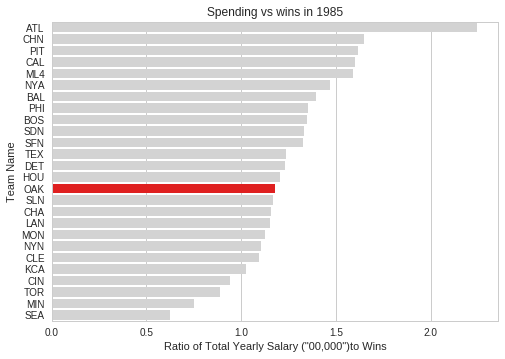

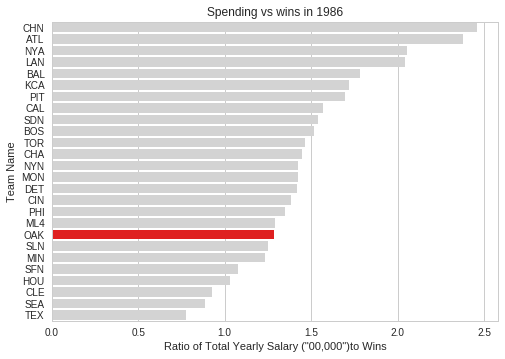

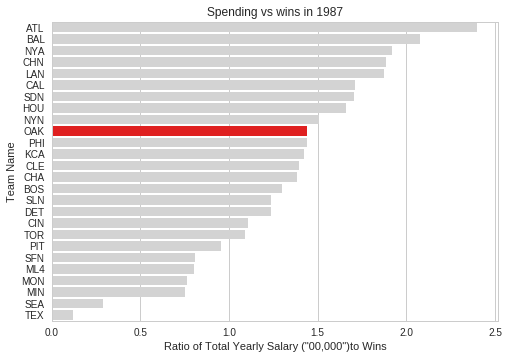

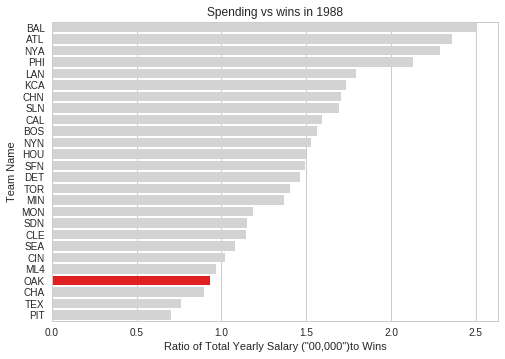

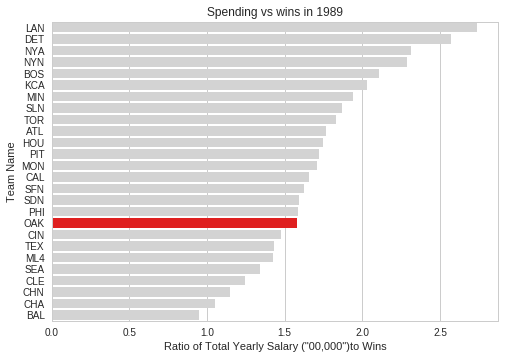

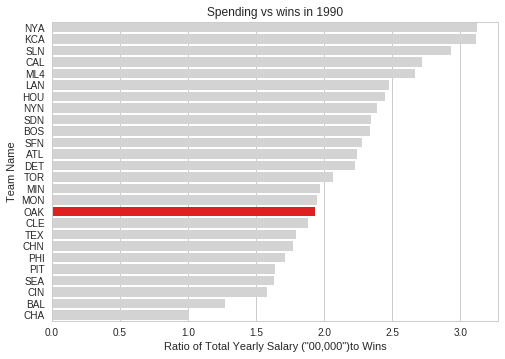

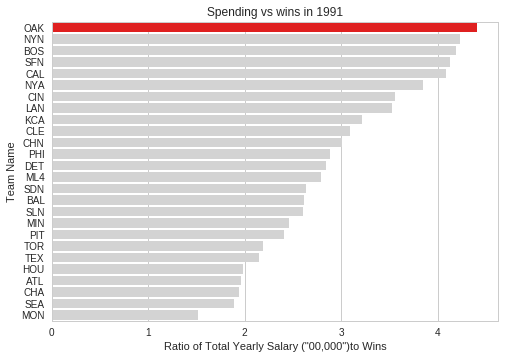

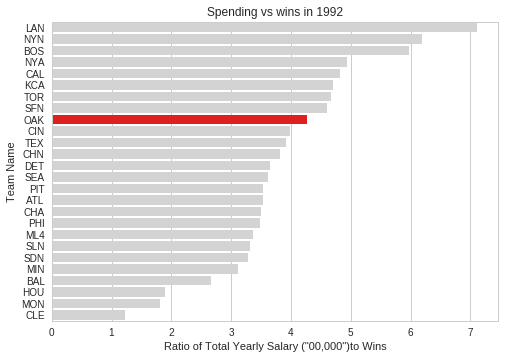

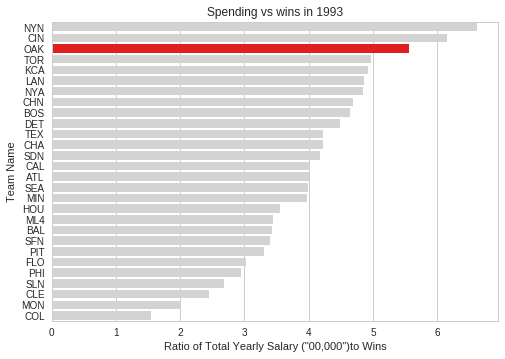

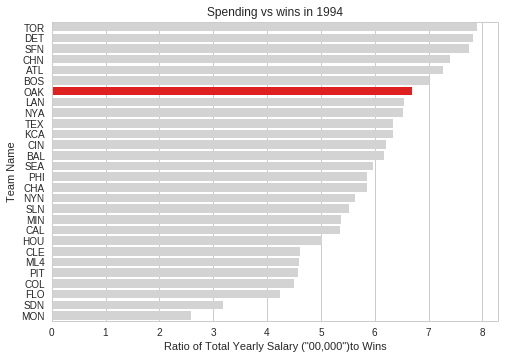

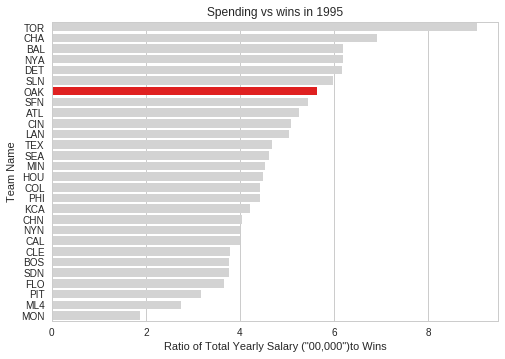

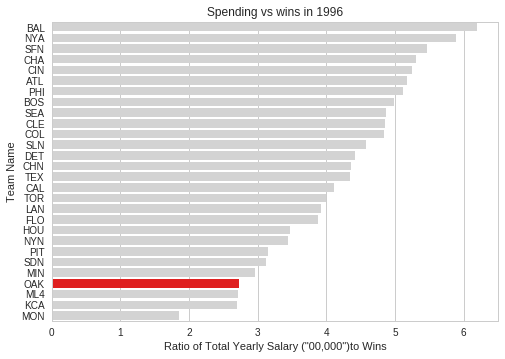

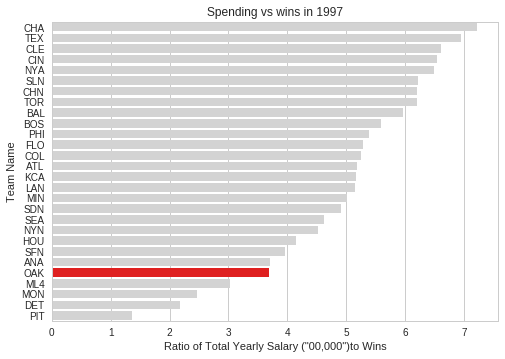

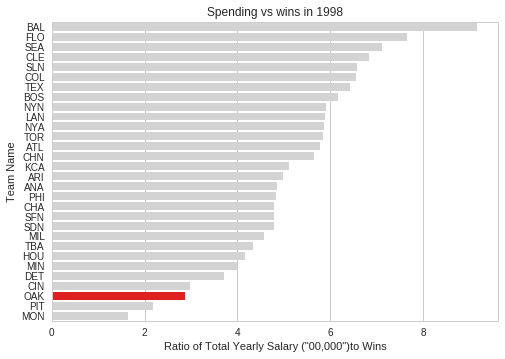

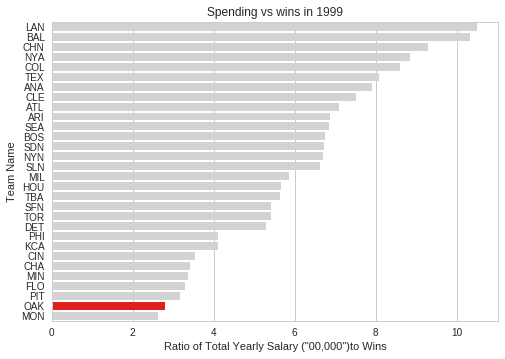

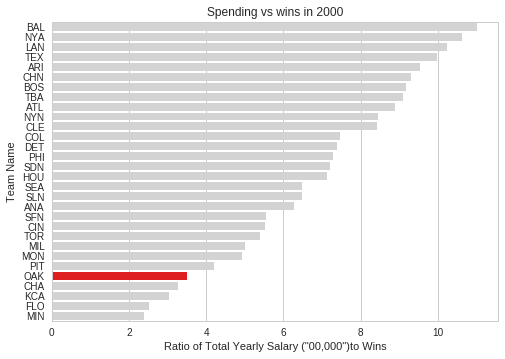

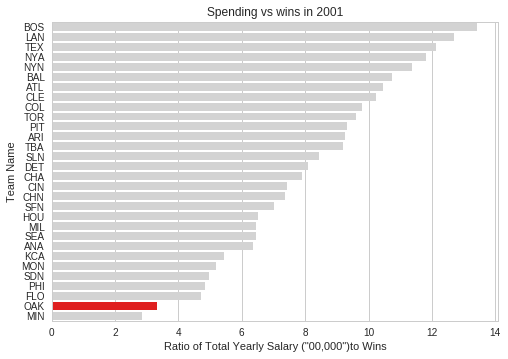

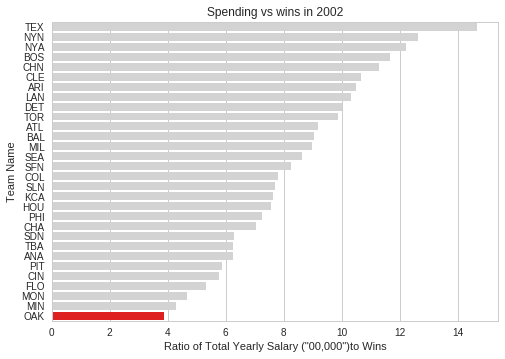

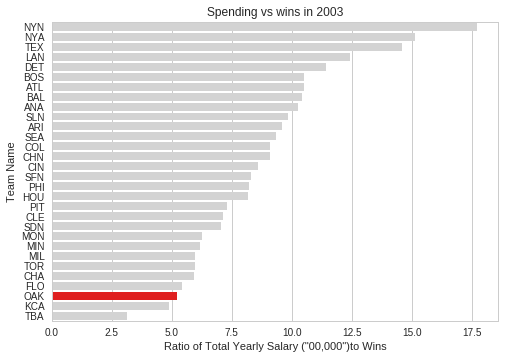

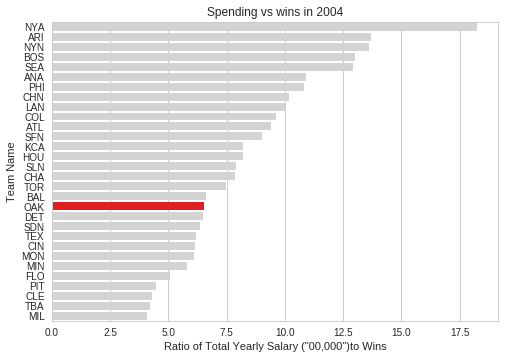

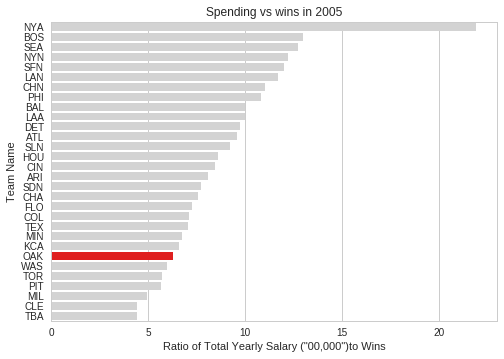

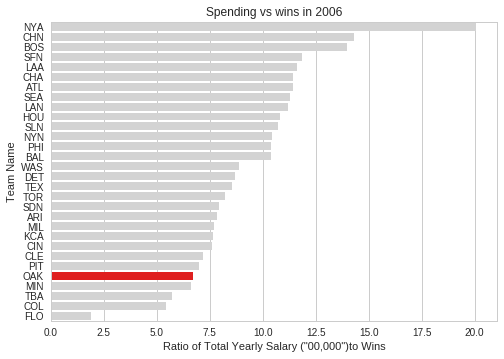

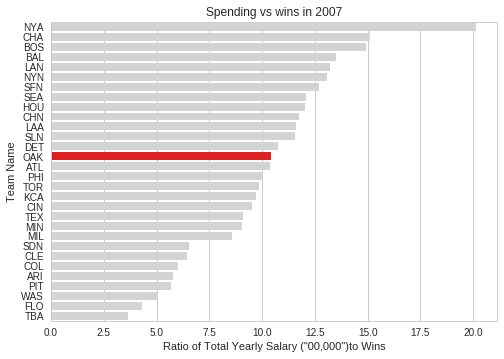

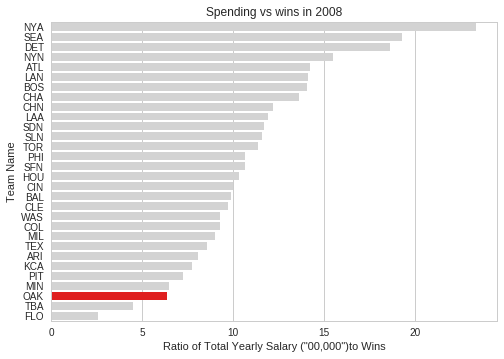

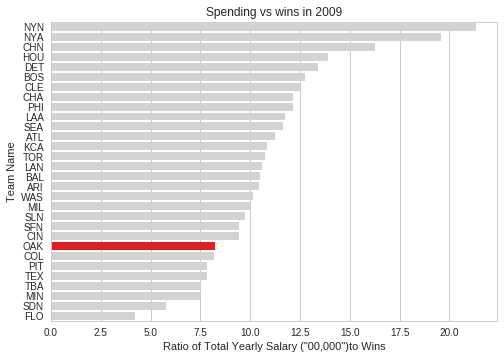

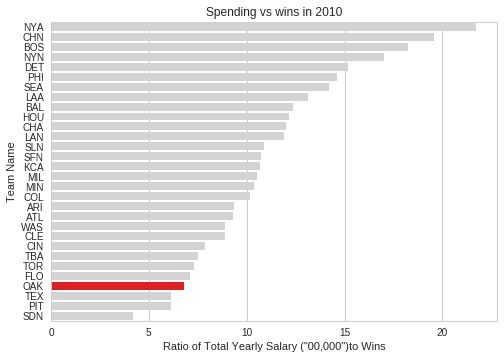

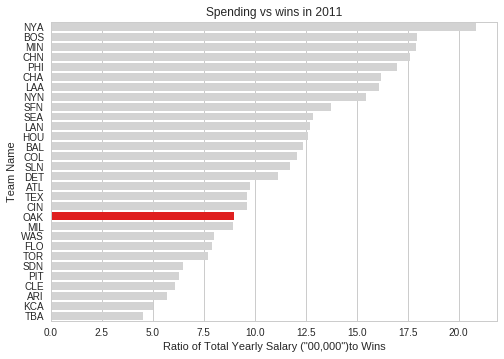

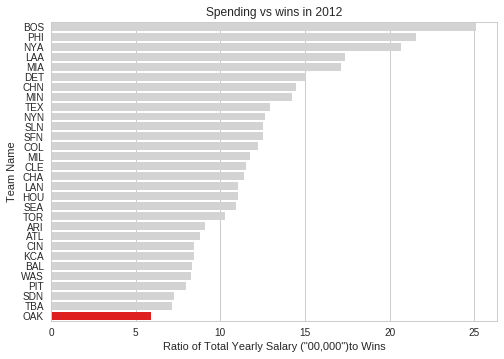

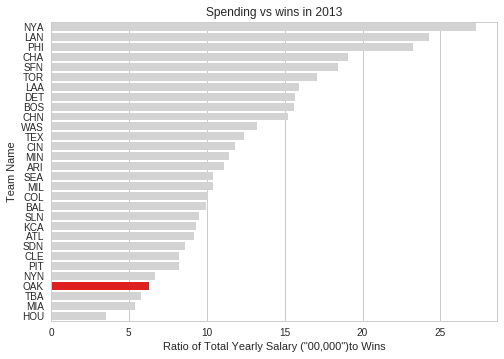

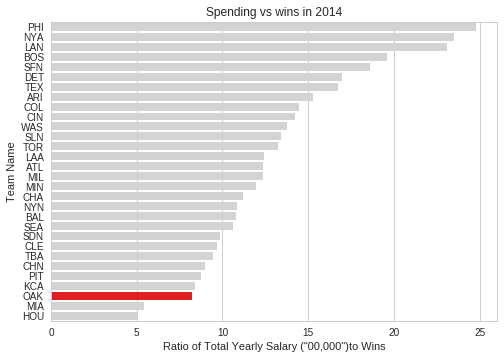

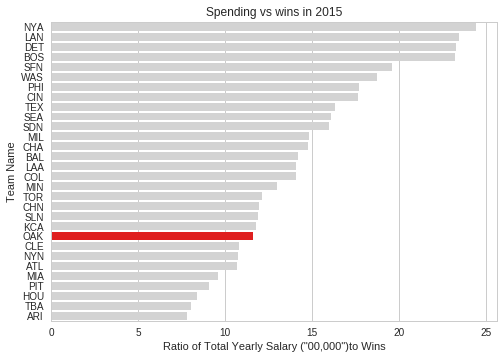

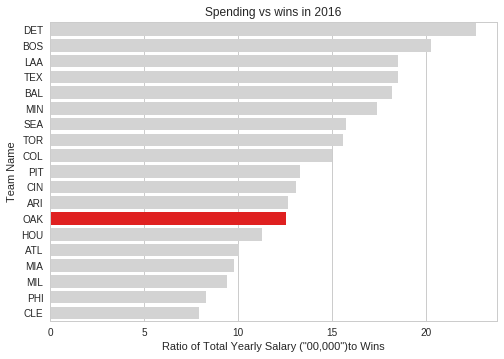

In [32]:
for year in xrange(1985,2017):
    dr_graph = df_w_yrsal[df_w_yrsal['yearID'] == year].sort_values(['sal_win'], ascending=False)

    clrs = ['red' if (y == 'OAK') else 'lightgray' for y in dr_graph['teamID'] ]
    ax = sns.barplot(x='sal_win', y="teamID", data=dr_graph, palette=clrs, orient='h')
    grph_title = 'Spending vs wins in ' + str(year)
    ax.set(xlabel="Ratio of Total Yearly Salary ('00,000)to Wins", ylabel='Team Name', title=grph_title)
    plt.show()

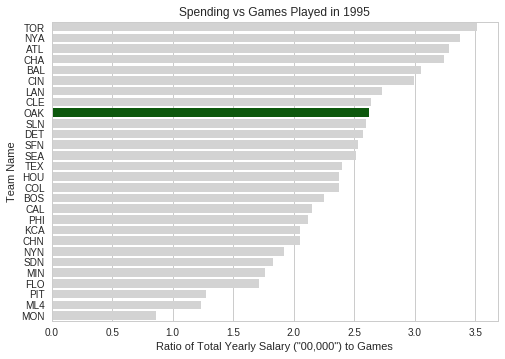

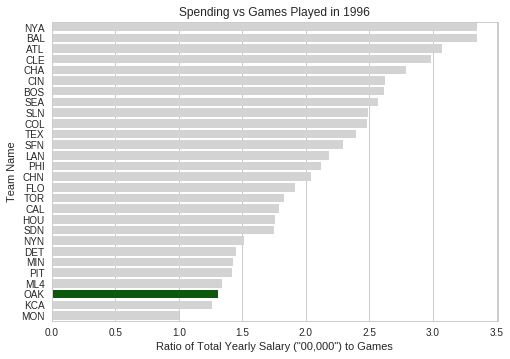

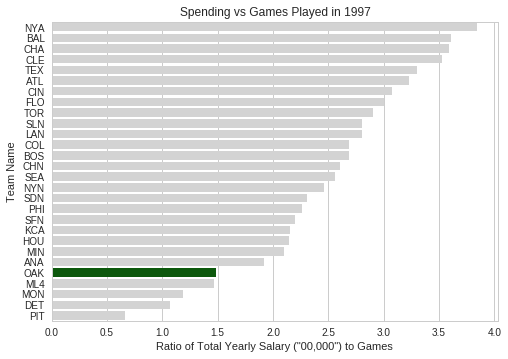

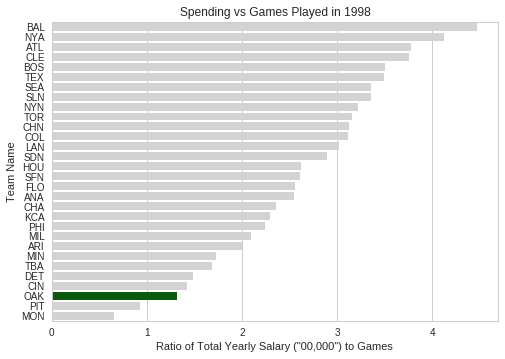

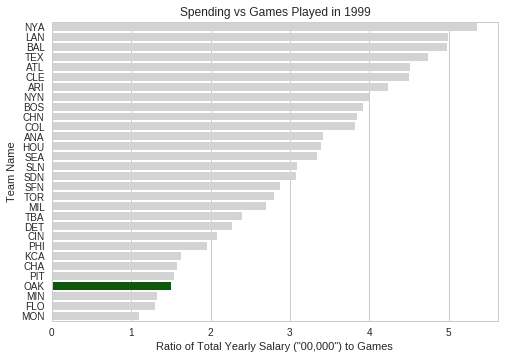

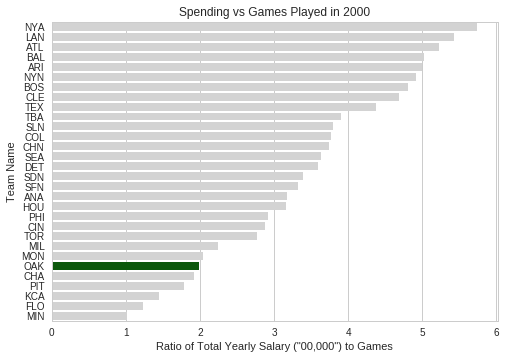

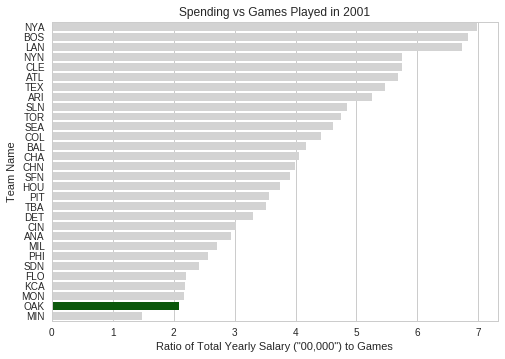

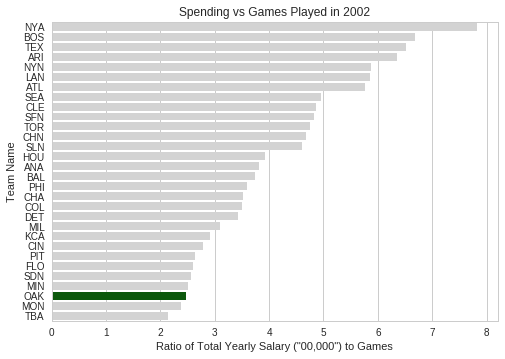

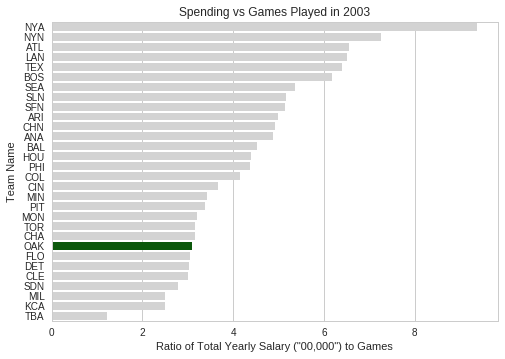

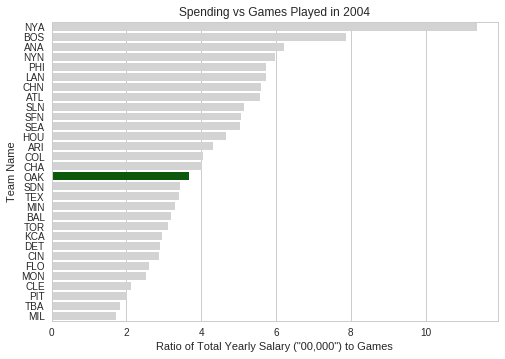

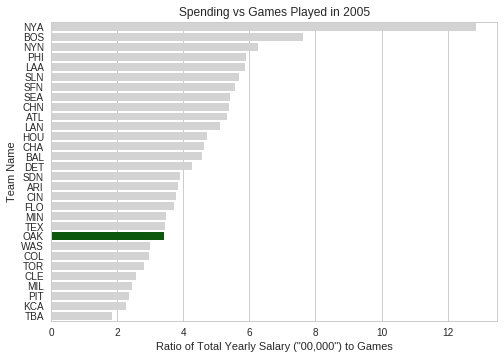

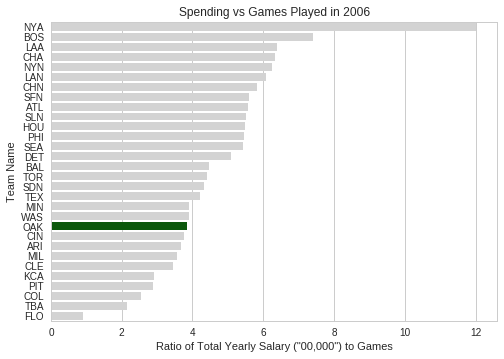

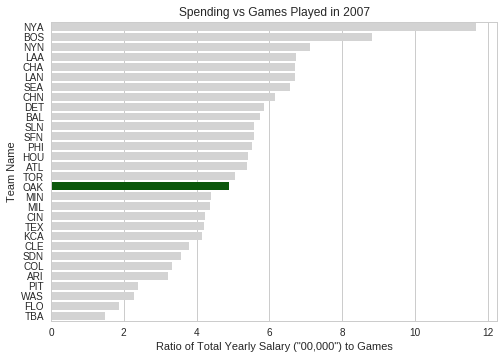

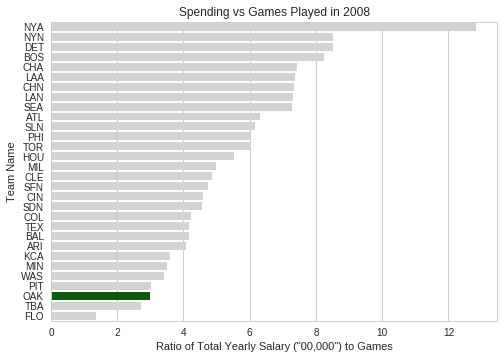

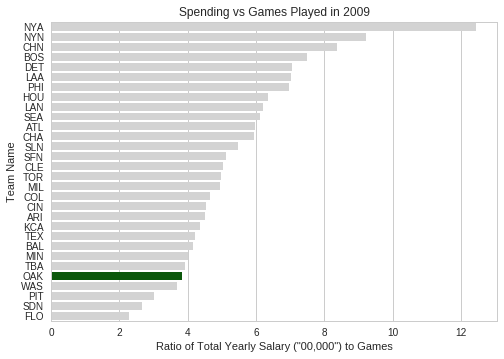

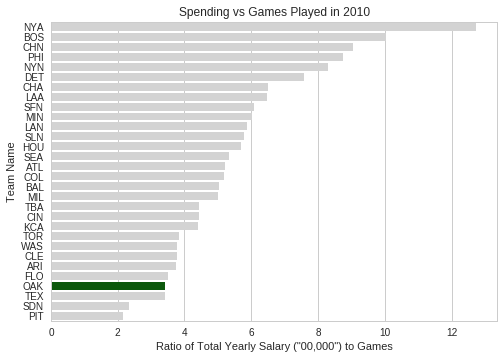

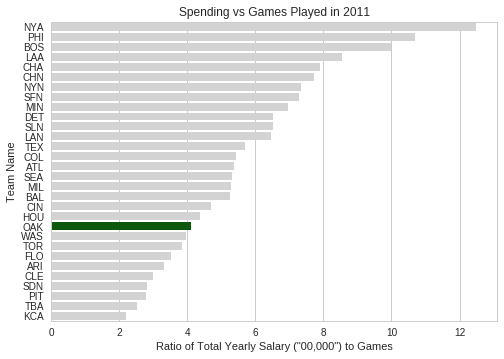

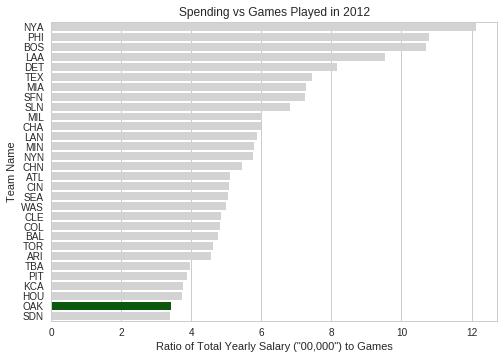

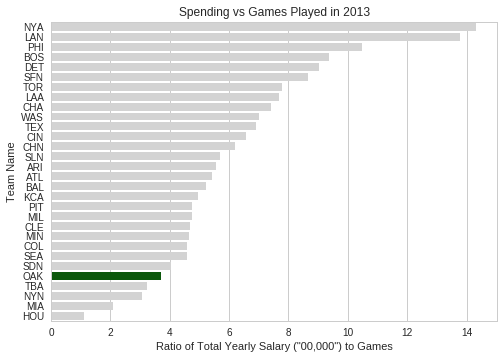

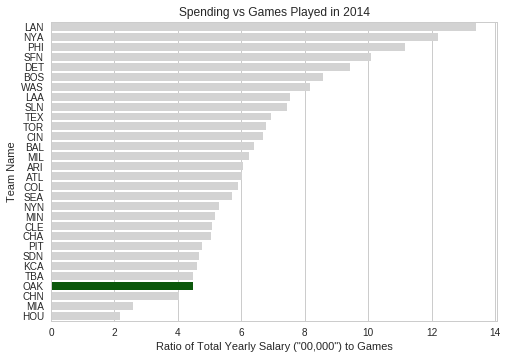

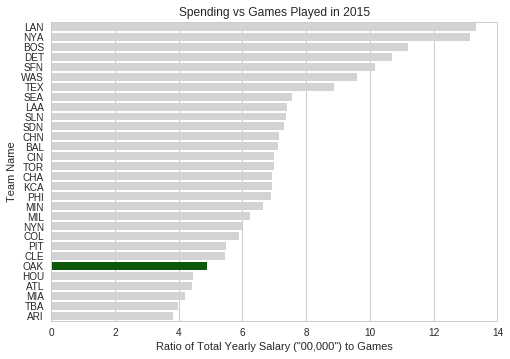

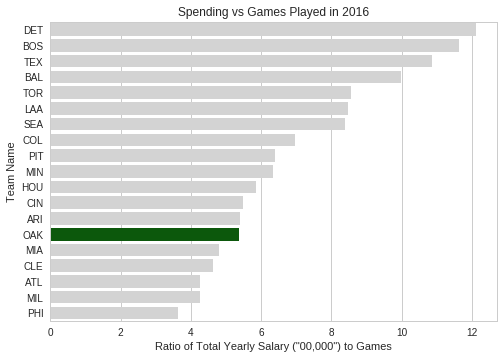

In [16]:
for year in xrange(1985,2017):
    dr_graph = df_w_yrsal[df_w_yrsal['yearID'] == year].sort_values(['sal_game'], ascending=False)

    clrs = ['darkgreen' if (y == 'OAK') else 'lightgray' for y in dr_graph['teamID'] ]
    ax = sns.barplot(x='sal_game', y="teamID", data=dr_graph, palette=clrs, orient='h')
    grph_title = 'Spending vs Games Played in ' + str(year)
    ax.set(xlabel="Ratio of Total Yearly Salary ('00,000) to Games", ylabel='Team Name', title=grph_title)
    plt.show()

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [89]:
# dep = wins, indep = total sal. 
import statsmodels.formula.api as sm
residuals = []
years = range(1985,2017)
for year in years:
    regress_graph = df_w_yrsal[df_w_yrsal['yearID'] == year]
    result = sm.ols(formula="W ~ yearSalary", data=regress_graph).fit()
    #get the residuals, a pd series
    regress_graph.loc[:,'resid'] = result.resid
    # get the resi corresponding to OAK as a list. append to residuals
    residuals.append(regress_graph[regress_graph['teamID'] == 'OAK']['resid'].tolist())

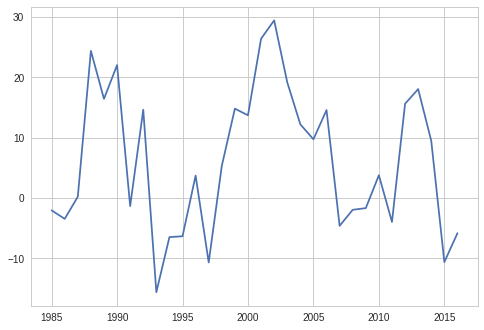

In [92]:
plt.plot(years, residuals)

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


>Graphically - from '95 to '96 we see the first big drop in OAK Yearly Salary vs Wins ratio, from seventh biggest to fourth lowest. They stay in the bottom four till 2004, when they reach the middle of the table. After that, they spend time on both the bottom and the middle of the table. 


> The regression supports this data - from 1998 - 2006, the residual is positive, suggesting that the OAK Wins outperformed prediction based on their salary alone. After that, the also outperformed in the years 2012-14.

## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [2]:
countries = pd.read_csv('../../2014_data/countries.csv')
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [3]:
url = 'http://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xlsx'

incomepp = pd.read_excel(url)
incomepp.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [4]:
Tincomepp = incomepp.T
Tincomepp.head()

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,NaN,NaN
1800,NaN,603,NaN,667,716,NaN,1197,618,NaN,757,...,NaN,NaN,877,NaN,663,869,NaN,507,NaN,NaN
1801,NaN,603,NaN,667,716,NaN,1199,620,NaN,757,...,NaN,NaN,879,NaN,665,870,NaN,507,NaN,NaN
1802,NaN,603,NaN,668,717,NaN,1201,623,NaN,757,...,NaN,NaN,882,NaN,667,871,NaN,507,NaN,NaN
1803,NaN,603,NaN,668,718,NaN,1204,626,NaN,757,...,NaN,NaN,884,NaN,668,872,NaN,507,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

*One thing could be a bar graph. But 262 entries! going to be tiny af. 
An idea I had 

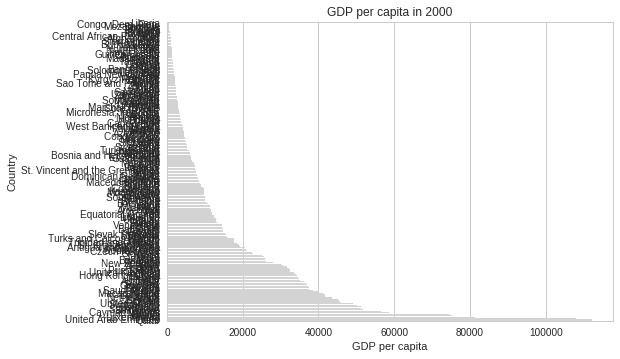

In [5]:
# yvals = Tincomepp.loc['GDP per capita']
# xvals = Tincomepp.loc[2000]
# sns.barplot(x=xvals, y=yvals, color='lightgray', orient='h')

year = 2000
dr_graph = Tincomepp.loc[['GDP per capita', year]]
dr_graph = dr_graph.dropna(axis=1).sort_values(year, axis =1)
# dr_graph = dr_graph.sort_values(year, axis =1) ## LEARNING:: sns DOES plot NaN vals - drop first!!!
ax = sns.barplot(x=dr_graph.loc[year], y=dr_graph.loc['GDP per capita'], color='lightgray', orient='h')

grph_title = 'GDP per capita in ' + str(year)
ax.set(xlabel="GDP per capita", ylabel='Country', title=grph_title)
plt.show()

In [6]:
import vincent
vincent.core.initialize_notebook() # req for ipython

In [10]:
import json
#Map the country names we have in our geometry to those in the
#county_data file, which contains additional rows we don't need
with open('HW1/vincent_map_data/world-countries.topo.json', 'r') as f:
    get_id = json.load(f)

#A little FIPS code type casting to ensure keys match
new_geoms = []
for geom in get_id['objects']['world-countries']['geometries']:
    geom['properties']['name'] = str(geom['properties']['name'])
    new_geoms.append(geom)

get_id['objects']['world-countries']['geometries'] = new_geoms

with open('HW1/vincent_map_data/world-countries.topo.json', 'w') as f:
    json.dump(get_id, f)

#Grab the FIPS codes and load them into a dataframe
geometries = get_id['objects']['world-countries']['geometries']
country_names = [x['properties']['name'] for x in geometries]
country_df = pd.DataFrame({'names': country_names}, dtype=str)
country_df.dtypes

names    object
dtype: object

In [11]:
working_df = dr_graph.T
working_df.columns=['country_n', 'incomes']
# country_df.head(5)
# #Read county unemployment data into Dataframe, cast to int for consistency
# df = pd.read_csv('data/us_county_data.csv', na_values=[' '])
# df['FIPS'] = df['FIPS'].astype(int)

# #Perform an inner join, 
merged = pd.merge(working_df, country_df, left_on='country_n', right_on='names', how='left')
# merged.head(3)
to_replace = merged.country_n[merged.names.isnull()].tolist()
len(merged[merged.names.isnull()])

47

In [12]:
working_df = working_df.replace(to_replace, value=
                    ['Democratic Republic of the Congo',
                     'East Timor',
                     'Guinea Bissau',
                     u'Comoros',
                     u'United Republic of Tanzania',
                     u'Kiribati',
                     u'Kyrgyzstan',
                     u'Sao Tome and Principe',
                     u'Laos',
                     u'Marshall Islands',
                     u"Ivory Coast",
                     u'Tuvalu',
                     u'Micronesia, Fed. Sts.',
                     u'Cape Verde',
                     u'West Bank',
                     u'Samoa',
                     u'Tonga',
                     u'Republic of the Congo',
                     u'Maldives',
                     u'St. Vincent and the Grenadines',
                     u'Republic of Serbia',
                     u'Dominican Republic',
                     u'Macedonia',
                     u'Nauru',
                     u'Grenada',
                     u'St. Lucia',
                     u'Mauritius',
                     u'Palau',
                     u'Barbados',
                     u'Slovakia',
                     u'Turks and Caicos Islands',
                     u'Seychelles',
                     u'St. Kitts and Nevis',
                     u'Antigua and Barbuda',
                     u'Malta',
                     u'The Bahamas',
                     u'Andorra',
                     u'Hong Kong, China',
                     u'Macao, China',
                     u'Aruba',
                     u'Bahrain',
                     u'United States of America',
                     u'Monaco',
                     u'Bermuda',
                     u'San Marino',
                     u'Singapore',
                     u'Cayman Islands'
                    ]
                )

In [13]:
merged = pd.merge(working_df, country_df, left_on='country_n', right_on='names', how='left')
len(merged[merged.names.isnull()])

32

In [14]:
geo_data = [{'name': 'countries',
             'url': 'HW1/vincent_map_data/world-countries.topo.json',
             'feature': 'world-countries'}]

vis = vincent.Map(data=merged, geo_data=geo_data, scale=200,
                  data_bind='incomes',
                  data_key='country_n', map_key={'countries': 'properties.name'})
vis.marks[0].properties.enter.stroke_opacity = vincent.ValueRef(value=0.5)
## Change our domain for an even integer
# vis.scales['color'].domain = [0, 50100]
vis.scales['color'].type = 'threshold'
vis.scales['color'].domain = [0, 1000, 5000, 10000, 20000, 30000, 40000, 50000]
vis.legend(title='Income 2011')


vis.display() # req for ipython


#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [16]:
# cleaning data. 

# def mergeByYear(year):
#     incomedf = incomepp.loc[:,['GDP per capita', year]]
#     ret = pd.merge(countries, incomedf, left_on='Country', right_on='GDP per capita', how='right')
#     ret.columns = ['drop', 'Region', 'Country', 'Income']
#     ret = ret[['Country','Region', 'Income']]
#     return ret

# df = mergeByYear(2010)

# identify Income recorded countries with no region w 2010 as base year
# to_change = df[df.Region.isnull() & ~ df.Income.isnull()]['Country'].tolist()

to_change = [u'Aruba',
 u'Bermuda',
 u'Burkina Faso',
 u'Cayman Islands',
 u'Congo, Dem. Rep.',
 u'Congo, Rep.',
 u"Cote d'Ivoire",
 u'Greenland',
 u'Hong Kong, China',
 u'North Korea',
 u'South Korea',
 u'Kosovo',
 u'Kyrgyz Republic',
 u'Lao',
 u'Macao, China',
 u'Macedonia, FYR',
 u'Micronesia, Fed. Sts.',
 u'Myanmar',
 u'Puerto Rico',
 u'Russia',
 u'St. Kitts and Nevis',
 u'St. Lucia',
 u'St. Vincent and the Grenadines',
 u'Slovak Republic',
 u'Taiwan',
 u'Timor-Leste',
 u'Turks and Caicos Islands',
 u'West Bank and Gaza']
changed = [
            u'Aruba',
            u'Bermuda',
            'Burkina',
            u'Cayman Islands',
            '"Congo, Democratic Republic of"',
            'Congo',
            "Ivory Coast",
            u'Greenland',
            u'Hong Kong, China',
            '"Korea, North"',
            '"Korea, South"',
            u'Kosovo',
            'Kyrgyzstan',
            'Laos',
            u'Macao, China',
            'Macedonia',
            'Micronesia',
            'Burma',
            u'Puerto Rico',
            'Russian Federation',
            'Saint Kitts and Nevis',
            'Saint Lucia',
            'Saint Vincent and the Grenadines',
            'Slovakia',
            u'Taiwan',
            'East Timor',
            u'Turks and Caicos Islands',
            u'West Bank and Gaza'
            ]
incomepp = incomepp.replace(to_change, changed)

In [17]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""

def mergeByYear(year):
    incomedf = incomepp.loc[:,['GDP per capita', year]]
    ret = pd.merge(countries, incomedf, left_on='Country', right_on='GDP per capita', how='right')
    ret.columns = ['drop', 'Region', 'Country', 'Income']
    ret = ret[['Country','Region', 'Income']]
    return ret

#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

In [18]:
results = {}
x = range(1985, 2016)

for year in x:
    df, grouped_data = None, None
    df = mergeByYear(year)
    grouped_data = df.groupby(df['Region']).mean()
    if results == {}:
        for region in grouped_data.index:
            results[region] = [grouped_data.at[region,'Income']]
    else:
        for region in grouped_data.index:
            results[region].append(grouped_data.at[region,'Income'])

In [19]:
for region in results.keys():
    print region

EUROPE
OCEANIA
AFRICA
ASIA
NORTH AMERICA
SOUTH AMERICA


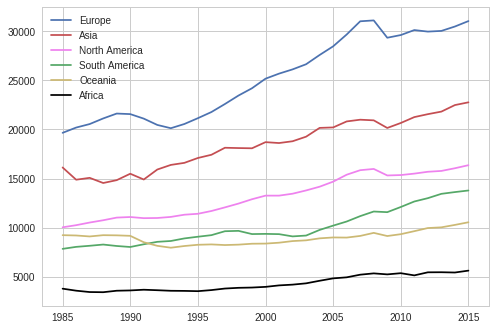

In [20]:
EUROPE = results['EUROPE']
OCEANIA = results['OCEANIA']
AFRICA = results['AFRICA']
ASIA = results['ASIA']
NAMERICA = results['NORTH AMERICA']
SAMERICA = results['SOUTH AMERICA']

plt.figure(1)
plt.plot(x, EUROPE,'b', label='Europe')
plt.plot(x, ASIA, 'r', label='Asia')
plt.plot(x, NAMERICA, 'violet', label='North America')
plt.plot(x, SAMERICA, 'g', label='South America')
plt.plot(x, OCEANIA, 'y', label='Oceania')
plt.plot(x, AFRICA, 'black', label='Africa')

plt.legend()
plt.show()

In [236]:
# for similar measure, boxplot with categorical = region, y = income, for years [1985, 90, 95, 10, 15]

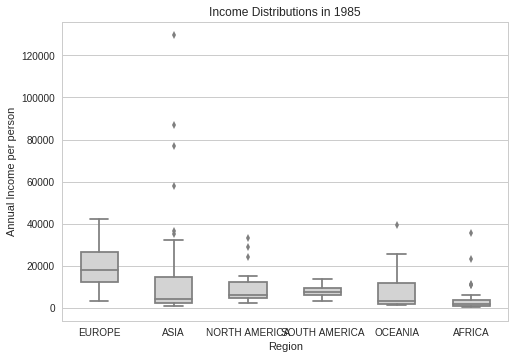

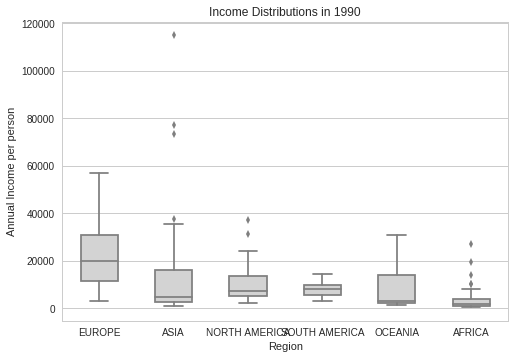

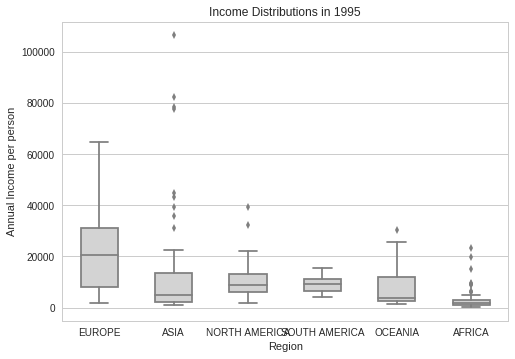

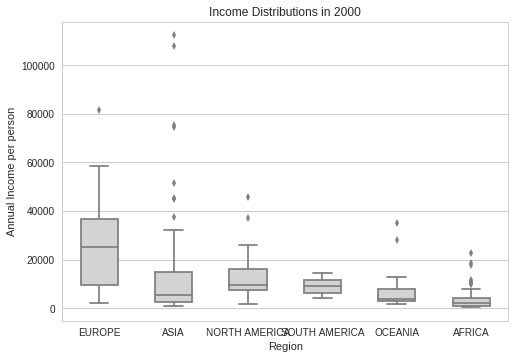

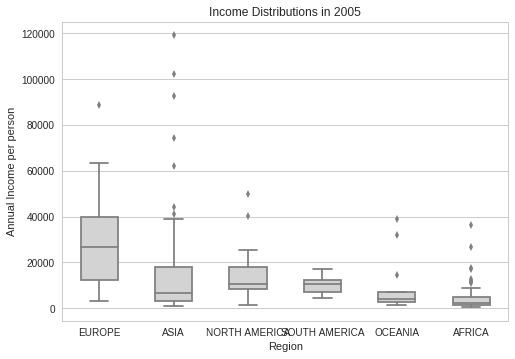

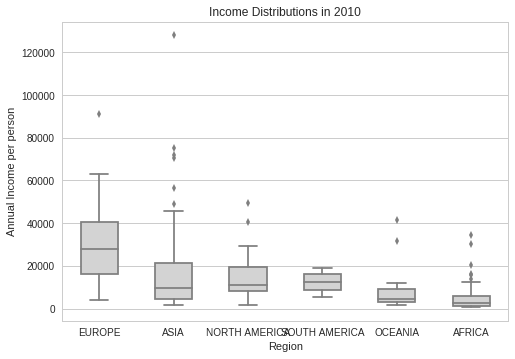

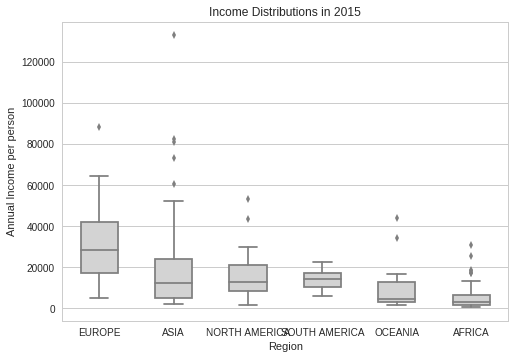

In [21]:
order = ['EUROPE', 'ASIA', 'NORTH AMERICA', 'SOUTH AMERICA', 'OCEANIA', 'AFRICA']
for year in [1985, 1990, 1995, 2000, 2005, 2010, 2015]:
    df = mergeByYear(year)
    ax = sns.boxplot(x="Region", y="Income", data = df, color='lightgray', width = 0.5, order=order)
    grph_title = 'Income Distributions in ' + str(year)
    ax.set(xlabel="Region", ylabel='Annual Income per person', title=grph_title)
    plt.show()

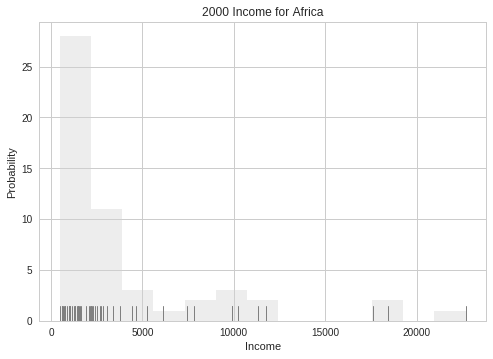

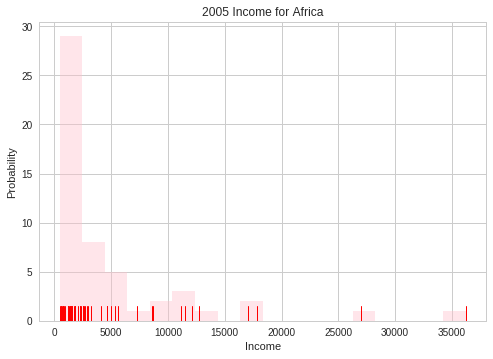

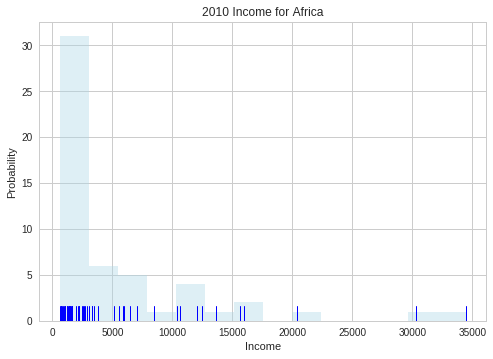

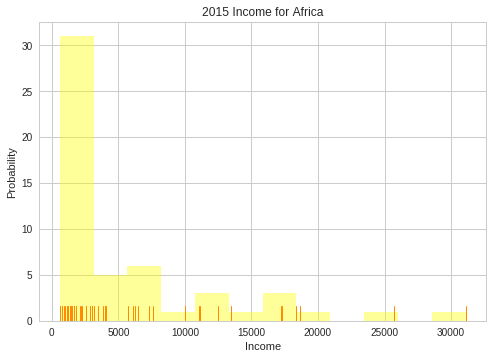

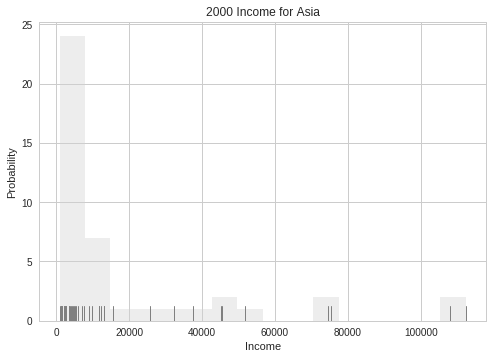

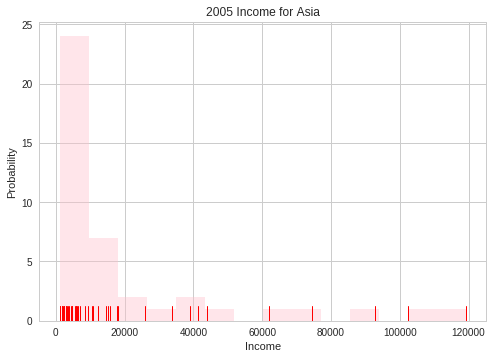

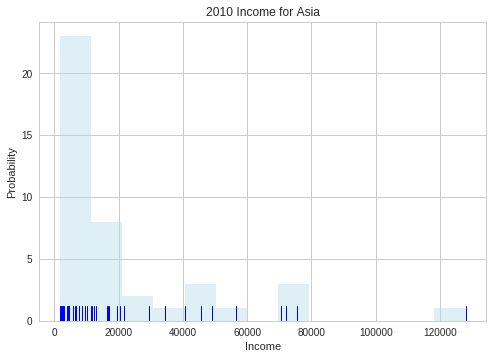

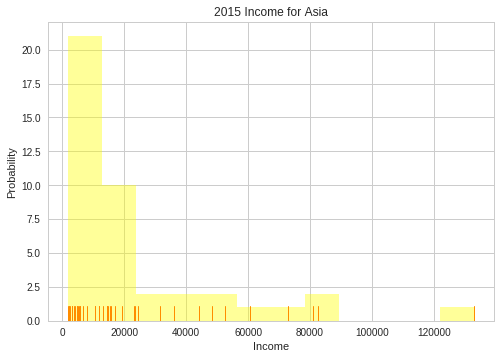

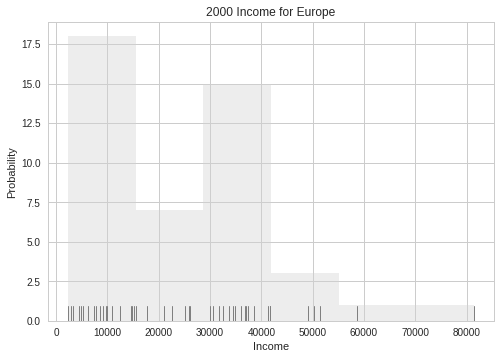

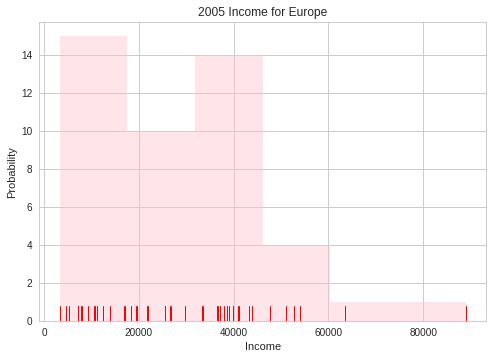

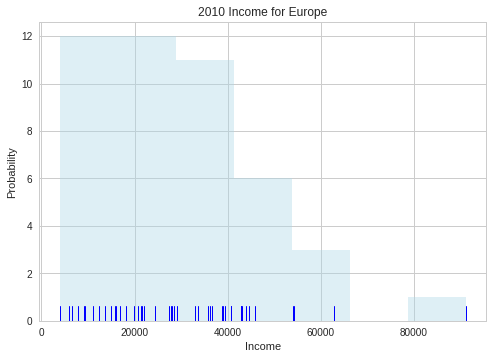

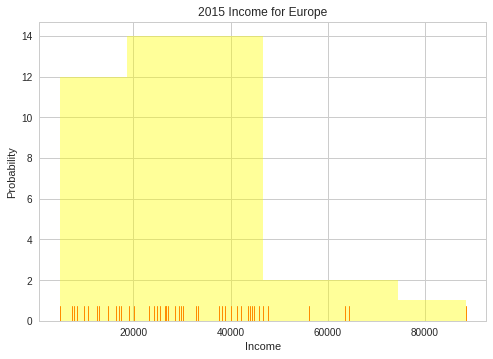

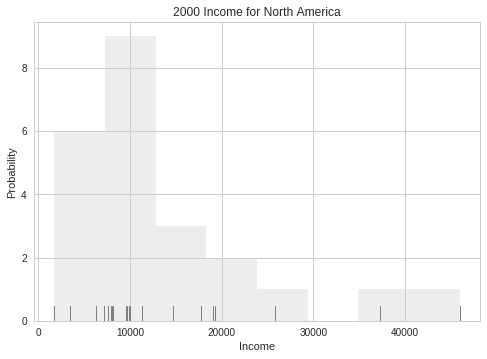

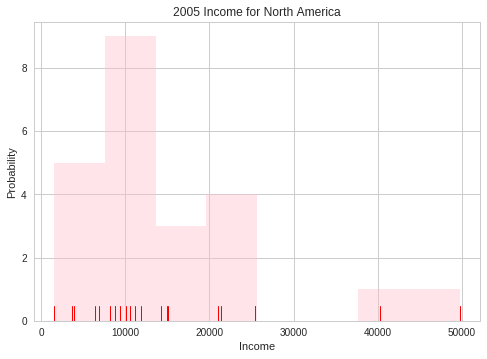

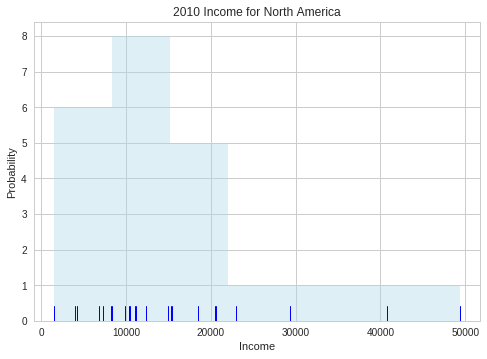

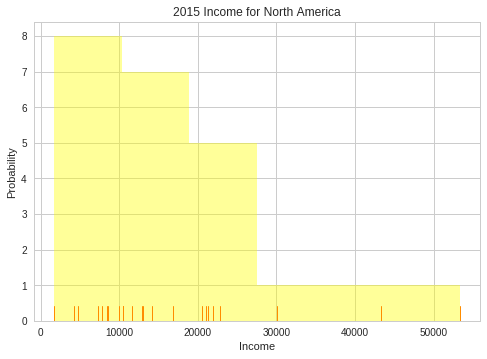

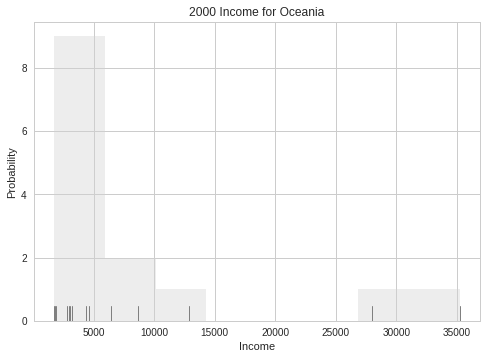

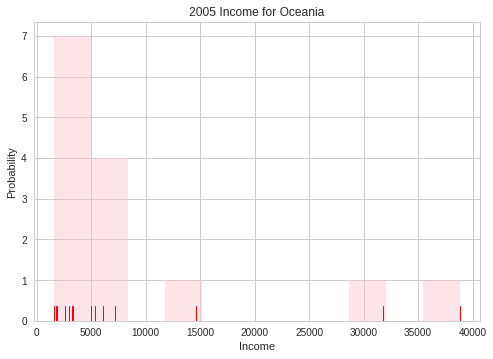

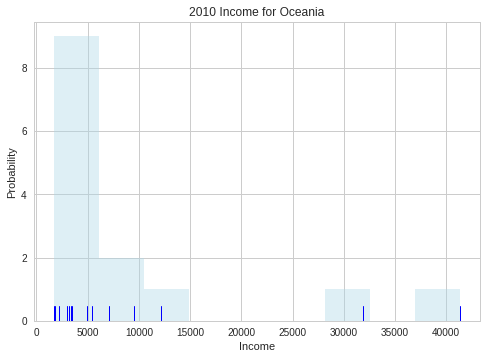

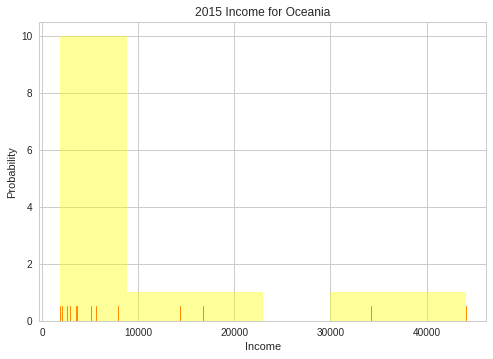

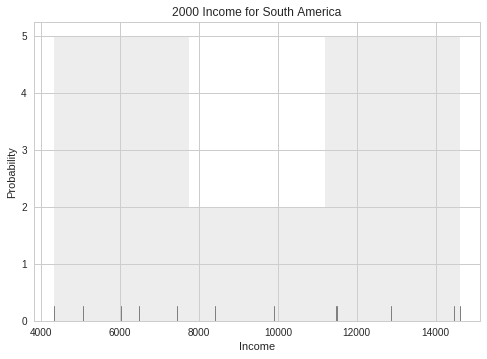

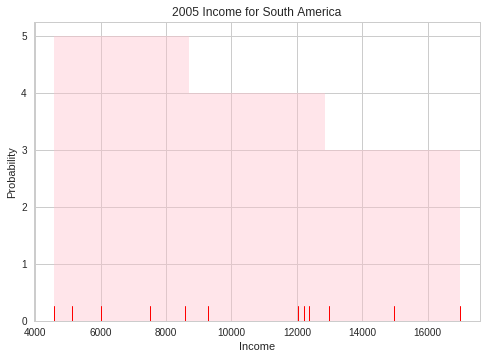

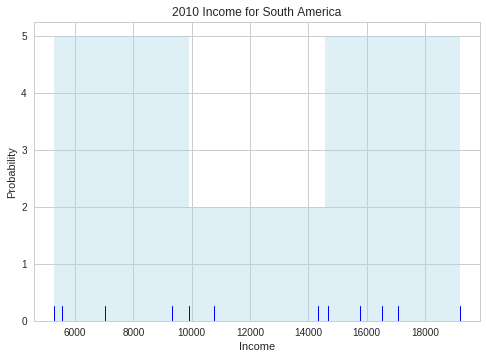

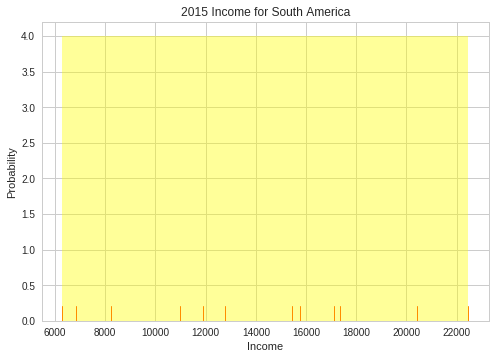

In [416]:
# (nah, box better) also consider sns.distplot within each region. - see how income inequality is shaping up.

# year, line color, hist color
sample = [
    (2000, 'gray', 'lightgray'),
    (2005, 'red', 'pink'),
    (2010, 'blue', 'lightblue'),
    (2015, 'darkorange', 'yellow')
]
drop = mergeByYear(2010).dropna()

for region in drop.Region.unique().tolist():
    for year, line_c, hist_c in sample:
        df = mergeByYear(year)
        df1 = df.dropna()
        df2 = df1[df1['Region'] == region]
        ax = sns.distplot(df2.Income, color=line_c, hist_kws={'color':hist_c}, rug=True, kde=False)
        grph_title = str(year) + " Income for " + (region).title()
        ax.set(xlabel='Income', ylabel='Probability', title=grph_title)
        plt.show()

## Discussion for Problem 
*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


> From the line graph in prob 2d, we can definitely see that the inequality between rich and poor regions has increased. > Europe has pulled far ahead of Africa. 

> The histograms for each region also reveals interesting pics. SA, Oceania gap closing, NA, Europe middle shift. Asia, Africa, no improvement. Asia huge outliers northward.

## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

*No?*

> *A = [15, 15, 15] = avg = 15*

> *B = [1, 1, 28] = avg = 10*

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

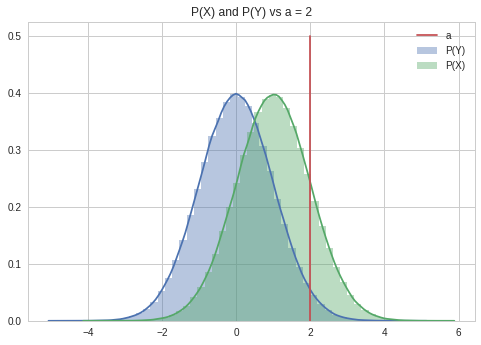

when a = 2, Pr(X > a)/Pr(Y > a) = 0.825123406481


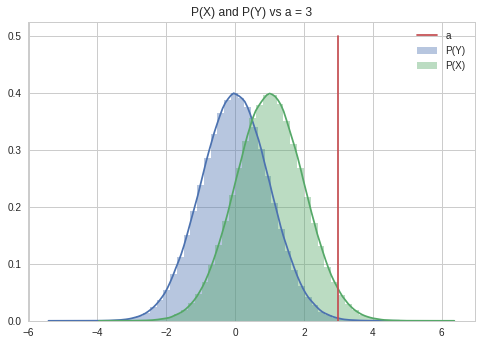

when a = 3, Pr(X > a)/Pr(Y > a) = 0.937151269596


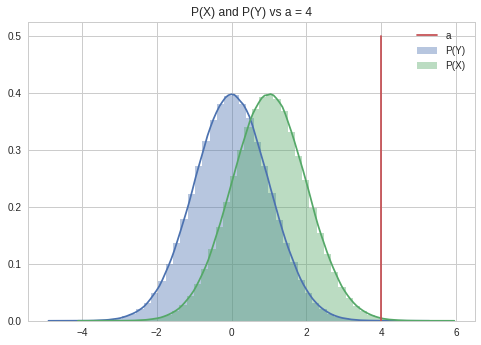

when a = 4, Pr(X > a)/Pr(Y > a) = 0.985275391157


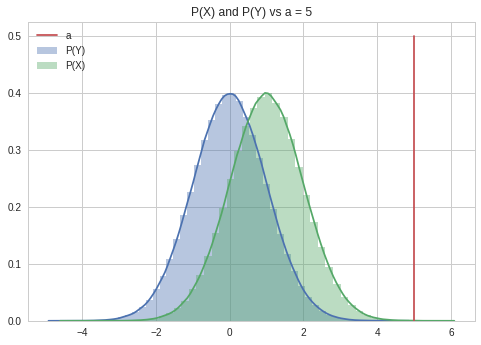

when a = 5, Pr(X > a)/Pr(Y > a) = 0.997864562564


In [35]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""


from scipy.stats import norm

def ratioNormals(diff, a):
    n = 1000000
    Y = np.random.randn(1, n)
    X = np.random.randn(1, n) + diff
    ax1 = sns.distplot(Y, label='P(Y)')
    ax2 = sns.distplot(X, label='P(X)')
    grph_title = "P(X) and P(Y) vs a = " + str(a)
    ax1.set(title = grph_title)
    plt.plot([a,a],[0,0.5],label='a')
    plt.legend()
    plt.show()
    return norm.sf(X, loc = a).mean() / norm.sf(Y, loc = a).mean()

for a in [2,3,4,5]:
    print "when a = " + str(a) + ", Pr(X > a)/Pr(Y > a) = " + str(ratioNormals(1,a))

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [89]:
df = mergeByYear(2012)
# df1 = df.dropna()
df1.groupby('Region').mean().sort_values('Income', ascending=False)

,Income
Region,
EUROPE,29955.133333
ASIA,21558.380952
NORTH AMERICA,15700.130435
SOUTH AMERICA,13015.750000
OCEANIA,9977.357143
AFRICA,5474.566038


> Asia has the higher average income - 21.5k/yr vs 13k/yr

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [59]:
df2 = df.dropna().groupby('Region')
df2.apply(lambda x: x['Income'] > 10000).groupby('Region').mean().sort_values(ascending=False)

Region
EUROPE           0.866667
SOUTH AMERICA    0.750000
NORTH AMERICA    0.652174
ASIA             0.523810
OCEANIA          0.285714
AFRICA           0.188679
Name: Income, dtype: float64

> South America has a larger proportion with income > 10,000 - infact, 75%! vs 52%

> Asia has some rich countries pulling the average up, but in general poorer.

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [40]:
url ='https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&output=xlsx'

popn = pd.read_excel(url)

In [83]:
popn12 = popn.loc[:,['Total population', 2012]].dropna()
popn12.columns = ['Country', 'Pop']
popn12['Pop'] = popn12.Pop.astype(int)

In [82]:
dfpop1 = pd.merge(df, popn12, how='left', on='Country').dropna()
dfpop1['totIncome'] = dfpop1.Income * dfpop1.Pop
dfpop1r = dfpop1.groupby('Region').sum()
dfpop1r['Avg Income'] = dfpop1r.totIncome / dfpop1r.Pop
dfpop1r.sort_values('Avg Income', ascending=False).drop(['Income', 'Pop', 'totIncome'], axis =1)

,Avg Income
Region,
NORTH AMERICA,36459.524638
OCEANIA,31312.284144
EUROPE,31299.092498
SOUTH AMERICA,14564.835293
ASIA,9724.724727
AFRICA,4874.834303


Avg income per person when multiplied by population.

In [88]:
dfpop2 = pd.merge(df, popn12, how='left', on='Country').dropna()
dfpop2['popgt10k'] = dfpop2.Pop[dfpop2.Income > 10000]
dfpop2.head()
dfpop210k = dfpop2.groupby('Region').sum()
name = 'Percentage of population earning more than 10k'
dfpop210k[name] = dfpop210k.popgt10k / dfpop210k.Pop
dfpop210k.sort_values(name, ascending=False).drop(['Income', 'Pop', 'popgt10k'], axis =1)

,Percentage of population earning more than 10k
Region,
SOUTH AMERICA,0.957148
NORTH AMERICA,0.912295
EUROPE,0.895241
OCEANIA,0.746677
ASIA,0.457101
AFRICA,0.201969


> The values are different when you study by populaton instead of country. popn is more accurate as country over weights small countries while under repping large ones.

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
